# Our data exists as vectors in matrixes 
Linear algeabra helps us manipulate data to eventually find the smallest sum squared errors of our data which will give us our beta value for our regression model 

In [1]:
import numpy as np
# create array to be transformed into vectors
x1 = np.array([1,2,1])
x2 = np.array([4,1,5])
x3 = np.array([6,8,6])
print("Array 1:", x1, sep="\n")
print("Array 2:", x2, sep="\n")
print("Array 3:", x3, sep="\n")

Array 1:
[1 2 1]
Array 2:
[4 1 5]
Array 3:
[6 8 6]


Next, transform these arrays into row vectors using matrix().

In [2]:
x1 = np.matrix(x1)
x2 = np.matrix(x2)
x3 = np.matrix(x3)

use np.concatenate() to combine the rows 

In [3]:
X = np.concatenate((x1, x2, x3), axis = 0)
X

matrix([[1, 2, 1],
        [4, 1, 5],
        [6, 8, 6]])

X.getI method gets inverse of matrix

In [4]:
X_inverse = X.getI()
X_inverse = np.round(X_inverse, 2)
X_inverse

array([[-8.5 , -1.  ,  2.25],
       [ 1.5 , -0.  , -0.25],
       [ 6.5 ,  1.  , -1.75]])

# Regression function - Pulling necessary data

We now know the necessary operations for inverting matrices and minimizing squared residuals. We can import real data and begin to analyze how variables influence one another. 

To start, we will use the Fraser economic freedom data. 

In [5]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [6]:
data = pd.read_csv('fraserDataWithRGDPPC.csv', 
                  index_col = [0,1],
                   parse_dates = True)

In [7]:
data

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2000-01-01  4.299839            5.365058   
         1995-01-01  5.518614            6.418859   
         1990-01-01  4.516140            5.108843   
         1985-01-01  4.226841            5.026250   
         1980-01-01  4.054740            6.322625   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2000-01-01                        4.662445     2.891166   
         1995-01-01                        5.138131     4.915293   
         1990-01-01                        3.439437     5.664840   
         1985-01-01                        2.633492     6.305850   
         1980-01-01                        1.379602     6.343342   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2000-01-01                          3.224735    5.355792   
         1995-01-01                          5.839664    5.423290   
         1990-01-01                          4.689623    3.953668   
         1985-01-01                          3.161743    4.207229   
         1980-01-01                          3.277015    3.280637   

                     RGDP Per Capita  
ISO_Code Year                         
ALB      2017-01-01              NaN  
         2016-01-01          11285.0  
         2015-01-01          10947.0  
         2014-01-01          10703.0  
         2013-01-01          10138.0  
...                              ...  
ZWE      2000-01-01           2696.0  
         1995-01-01           2841.0  
         1990-01-01           3265.0  
         1985-01-01           3615.0  
         1980-01-01           4003.0  

[3030 rows x 7 columns]

In [8]:
years = np.array(sorted(list(set(data.index.get_level_values("Year")))))
years = pd.date_range(years[0], years[-2], freq = "AS")
countries = sorted(list(set(data.index.get_level_values("ISO_Code"))))
index_names = list(data.index.names)
multi_index = pd.MultiIndex.from_product([countries, years[:-1]], names = data.index.names)
data = data.reindex(multi_index)

data["RGDP Per Capita Lag"] = data.groupby("ISO_Code")["RGDP Per Capita"].shift()

In [9]:
data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      1970-01-01       NaN                 NaN   
         1971-01-01       NaN                 NaN   
         1972-01-01       NaN                 NaN   
         1973-01-01       NaN                 NaN   
         1974-01-01       NaN                 NaN   
...                       ...                 ...   
ZWE      2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   
         2015-01-01  6.145330            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      1970-01-01                             NaN          NaN   
         1971-01-01                             NaN          NaN   
         1972-01-01                             NaN          NaN   
         1973-01-01                             NaN          NaN   
         1974-01-01                             NaN          NaN   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      1970-01-01                               NaN         NaN   
         1971-01-01                               NaN         NaN   
         1972-01-01                               NaN         NaN   
         1973-01-01                               NaN         NaN   
         1974-01-01                               NaN         NaN   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita  RGDP Per Capita Lag  
ISO_Code Year                                              
AGO      1970-01-01              NaN                  NaN  
         1971-01-01              NaN                  NaN  
         1972-01-01              NaN                  NaN  
         1973-01-01              NaN                  NaN  
         1974-01-01              NaN                  NaN  
...                              ...                  ...  
ZWE      2011-01-01           1515.0               1425.0  
         2012-01-01           1623.0               1515.0  
         2013-01-01           1801.0               1623.0  
         2014-01-01           1797.0               1801.0  
         2015-01-01           1759.0               1797.0  

[7452 rows x 8 columns]

In [10]:
data.dropna(axis = 0).loc['GBR']

,EFW,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,RGDP Per Capita,RGDP Per Capita Lag
Year,,,,,,,,
2001-01-01,8.452018,6.961156,8.234602,9.520818,9.231009,8.312506,35182.0,34390.0
2002-01-01,8.490705,7.139978,8.144261,9.484984,9.161324,8.522978,35384.0,35182.0
2003-01-01,8.499127,7.039513,8.245855,9.414910,9.236219,8.559139,35354.0,35384.0
2004-01-01,8.382597,6.920611,8.069173,9.426507,8.908917,8.587775,36320.0,35354.0
2005-01-01,8.393285,6.922756,8.265496,9.449126,8.786506,8.542543,37724.0,36320.0
2006-01-01,8.302836,6.914460,7.982602,9.395209,8.748802,8.473108,38251.0,37724.0
2007-01-01,8.192020,6.929650,7.644268,9.435705,8.686429,8.264048,38071.0,38251.0
2008-01-01,8.025975,6.161823,7.807282,9.406692,8.600234,8.153843,37657.0,38071.0
2009-01-01,8.010150,6.282977,7.979651,9.499708,8.744129,7.544287,35730.0,37657.0


# Running Regression Model: 



In [11]:
y_vars = ['RGDP Per Capita']
x_vars = [
    'Size of Government', 'Legal System & Property Rights', 'Sound Money',
    'Freedom to trade internationally', 'Regulation'
]
reg_vars = y_vars + x_vars
reg_data = data[reg_vars].dropna()
reg_data.corr().round(2)

,RGDP Per Capita,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
RGDP Per Capita,1.00,-0.15,0.68,0.44,0.49,0.50
Size of Government,-0.15,1.00,-0.10,0.20,0.24,0.21
Legal System & Property Rights,0.68,-0.10,1.00,0.52,0.63,0.59
Sound Money,0.44,0.20,0.52,1.00,0.68,0.60
Freedom to trade internationally,0.49,0.24,0.63,0.68,1.00,0.65
Regulation,0.50,0.21,0.59,0.60,0.65,1.00


In [12]:
reg_data.describe().round(2)

,RGDP Per Capita,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
count,2579.00,2579.00,2579.00,2579.00,2579.00,2579.00
mean,15913.65,6.35,5.23,7.76,6.90,6.66
std,17204.60,1.24,1.74,1.85,1.52,1.17
min,432.00,1.57,0.99,0.00,0.00,2.10
25%,3472.50,5.52,3.96,6.74,6.18,5.93
50%,10032.00,6.42,5.17,8.11,7.15,6.75
75%,23393.50,7.18,6.35,9.32,7.98,7.48
max,156144.00,9.51,9.14,9.89,10.00,9.44


In [14]:
y = reg_data[y_vars]
x = reg_data[x_vars]
x['Constant'] = 1
results = sm.OLS(y, x).fit()

In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     513.2
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:17:36   Log-Likelihood:                -27920.
No. Observations:                2579   AIC:                         5.585e+04
Df Residuals:                    2573   BIC:                         5.589e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government               -2325.3408    217.288    -10.702      0.000   -2751.418   -1899.263
Legal System & Property Rights    4725.0365    202.938     23.283      0.000    4327.099    5122.974
Sound Money                        747.3062    185.243      4.034      0.000     384.067    1110.546
Freedom to trade internationally   782.7867    256.383      3.053      0.002     280.049    1285.524
Regulation                        2374.8726    297.133      7.993      0.000    1792.229    2957.516
Constant                         -2.103e+04   1704.117    -12.339      0.000   -2.44e+04   -1.77e+04
==============================================================================
Omnibus:                     2065.733   Durbin-Watson:                   0.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76781.322
Skew:                           3.504   Prob(JB):                         0.00
Kurtosis:                      28.796   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Year'>

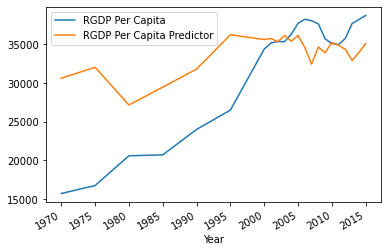

In [17]:

predictor = results.predict()
reg_data[y_vars[0] + " Predictor"] = predictor
reg_data.loc["GBR", [y_vars[0], y_vars[0] + " Predictor"]].plot()

# OLS Statistics 

We have calculated beta values for each independent variable, meaning that we estimated the average effect of a change in each independent variable upon the dependent variable. While this is useful, we have not yet measured the statistical significance of these estimations; neither have we determined the explanatory power of our particular regression.

Our regression has estimated predicted values for our dependent variable given the values of the independent variables for each observation. Together, these estimations for an array of predicted values that we will refer to as $y ̂ $. We will refer to individual predicted values as ($y_i$) ̂. We will also refer to the mean value of observations of our dependent variable as $y ̅ $ and individual observed values of our dependent variable as $y_i$. These values will be use to estimate the sum of squares due to regression ($SSR$), sum of squared errors ($SSE$), and the total sum of squares ($SST$). By comparing the estimated $y$ values, the observed $y$ values, and the mean of $y$, we will estimate the standard error for each coefficient and other values that estimate convey the significance of the estimation.

We define these values as follows:

$SSR = \sum_{i=0}^{n} (y ̂ _{i} - y ̅ )^2$

$SSE = \sum_{i=0}^{n} (y_{i} - y ̂ _{i})^2$

$SST = \sum_{i=0}^{n} (y_{i} - y ̅ _{i})^2$

It happens that the sum of the squared distances between the estimated values and mean of observed values and the squared distances between the observed and estimated values add up to the sum of the squared distances between the observed values and the mean of observed values. We indicate this as:

$SST = SSR + SSE$

The script below will estimate these statistics. It calls the sum_square_stats method from the which is passed in the calculate_regression_stats method.

In [20]:
y_name = y_vars[0]
y_hat = reg_data[y_name + " Predictor"]
y_mean = reg_data[y_name].mean()
y = reg_data[y_name]
y_hat, y_mean, y

(ISO_Code  Year      
 AGO       2005-01-01      73.776545
           2006-01-01    3763.314400
           2007-01-01    4889.656730
           2008-01-01    4511.502334
           2009-01-01     -64.940780
                            ...     
 ZWE       2011-01-01     324.435212
           2012-01-01    -844.258736
           2013-01-01    -172.556682
           2014-01-01    1146.758144
           2015-01-01    8472.316273
 Name: RGDP Per Capita Predictor, Length: 2579, dtype: float64,
 15913.645599069407,
 ISO_Code  Year      
 AGO       2005-01-01    3364.0
           2006-01-01    4558.0
           2007-01-01    5314.0
           2008-01-01    6318.0
           2009-01-01    5212.0
                          ...  
 ZWE       2011-01-01    1515.0
           2012-01-01    1623.0
           2013-01-01    1801.0
           2014-01-01    1797.0
           2015-01-01    1759.0
 Name: RGDP Per Capita, Length: 2579, dtype: float64)

In [21]:
reg_data["Residuals"] = y_hat.sub(y_mean)
reg_data["Squared Residuals"] = reg_data["Residuals"].pow(2)
reg_data["Squared Errors"] = (y.sub(y_hat)) ** 2
reg_data["Squared Totals"] = (y.sub(y_mean)) ** 2


In [22]:
SSR = reg_data["Squared Residuals"].sum()
SSE = reg_data["Squared Errors"].sum()
SST = reg_data["Squared Totals"].sum()

SSR, SSE, SST

(381036440167.77405, 382046962202.30414, 763083402370.0775)

In [23]:
n = results.nobs
k = len(results.params)
estimator_variance = SSE / (n-k)
n, k, estimator_variance

(2579.0, 6, 148483078.97485587)

In [28]:
cov_matrix = results.cov_params()
cov_matrix

,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,Constant
Size of Government,47214.173521,16858.274177,-2707.751698,-13524.761306,-11325.259004,-1.980258e+05
Legal System & Property Rights,16858.274177,41183.740950,-3955.450072,-19938.341690,-19608.760367,-2.342283e+04
Sound Money,-2707.751698,-3955.450072,34314.816773,-18661.975744,-12691.037608,-1.505731e+04
Freedom to trade internationally,-13524.761306,-19938.341690,-18661.975744,65732.182419,-17035.902546,-5.514277e+03
Regulation,-11325.259004,-19608.760367,-12691.037608,-17035.902546,88287.874682,-1.971946e+05
Constant,-198025.802376,-23422.832046,-15057.314064,-5514.276728,-197194.568344,2.904015e+06


## Calculate t-stats

In [29]:
parameters = {}
for x_var in cov_matrix.keys():
    parameters[x_var] = {}
    parameters[x_var]["Beta"] = results.params[x_var]
    parameters[x_var]["Standard Error"] = cov_matrix.loc[x_var, x_var]**(1 / 2)
    parameters[x_var]["t_stats"] = parameters[x_var]["Beta"] / parameters[
        x_var]["Standard Error"]

pd.DataFrame(parameters).T

,Beta,Standard Error,t_stats
Size of Government,-2325.340766,217.288227,-10.701642
Legal System & Property Rights,4725.036489,202.937776,23.283179
Sound Money,747.306175,185.242589,4.034203
Freedom to trade internationally,782.786662,256.382882,3.053194
Regulation,2374.872619,297.132756,7.992631
Constant,-21027.253069,1704.116995,-12.339090


In [30]:
r2 = SSR / SST
r2

0.49933786920840445

In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     513.2
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:19:30   Log-Likelihood:                -27920.
No. Observations:                2579   AIC:                         5.585e+04
Df Residuals:                    2573   BIC:                         5.589e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government               -2325.3408    217.288    -10.702      0.000   -2751.418   -1899.263
Legal System & Property Rights    4725.0365    202.938     23.283      0.000    4327.099    5122.974
Sound Money                        747.3062    185.243      4.034      0.000     384.067    1110.546
Freedom to trade internationally   782.7867    256.383      3.053      0.002     280.049    1285.524
Regulation                        2374.8726    297.133      7.993      0.000    1792.229    2957.516
Constant                         -2.103e+04   1704.117    -12.339      0.000   -2.44e+04   -1.77e+04
==============================================================================
Omnibus:                     2065.733   Durbin-Watson:                   0.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76781.322
Skew:                           3.504   Prob(JB):                         0.00
Kurtosis:                      28.796   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Plot Residuals

(array([-40000., -30000., -20000., -10000.,      0.,  10000.,  20000.,
         30000.,  40000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

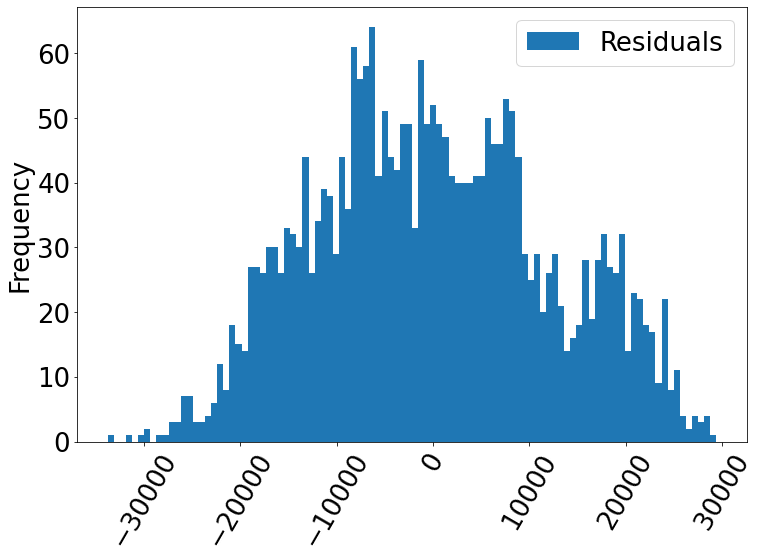

In [32]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 26})
fig, ax = plt.subplots(figsize=(12, 8))
reg_data[["Residuals"]].plot.hist(bins=100, ax=ax)
plt.xticks(rotation=60)

slightly skewed left. Need to log the data in order to normally distrbute it 

# Regression using rates 

In [68]:
reg_data = data
reg_data["RGDP Per Capita"] = data.groupby("ISO_Code")["RGDP Per Capita"].pct_change() 
reg_data["RGDP Per Capita Lag"] = reg_data["RGDP Per Capita"].shift() 
reg_data = reg_data.replace([np.inf, -np.inf], np.nan).dropna(axis = 0, how = "any")
reg_data.loc["USA"]

,EFW,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,RGDP Per Capita,RGDP Per Capita Lag
Year,,,,,,,,
2002-01-01,8.457409,7.642580,7.924788,9.801028,8.114732,8.803917,-44.230701,-1.001189
2003-01-01,8.454976,7.830378,7.803444,9.815523,8.142189,8.683346,1.271231,-44.230701
2004-01-01,8.443225,7.717933,7.767612,9.727209,8.194439,8.808933,0.470007,1.271231
2005-01-01,8.353783,7.706034,7.540888,9.758164,8.063767,8.700063,-0.153550,0.470007
2006-01-01,8.318497,7.701156,7.360503,9.655075,8.079715,8.796037,-0.298227,-0.153550
2007-01-01,8.394524,7.790872,7.447685,9.735613,8.114240,8.884209,-0.514747,-0.298227
2008-01-01,8.244885,7.496386,7.409211,9.686262,7.998733,8.633830,-2.507119,-0.514747
2009-01-01,7.965853,7.147290,7.188374,9.604751,7.723552,8.165299,1.948400,-2.507119
2010-01-01,7.972577,7.108888,7.143095,9.678239,7.720760,8.211905,-1.463317,1.948400


In [69]:
reg_data.corr().round(2)

,EFW,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,RGDP Per Capita,RGDP Per Capita Lag
EFW,1.00,0.25,0.80,0.85,0.89,0.81,0.01,0.01
Size of Government,0.25,1.00,-0.18,0.10,0.14,0.08,-0.03,-0.03
Legal System & Property Rights,0.80,-0.18,1.00,0.59,0.67,0.66,0.04,0.03
Sound Money,0.85,0.10,0.59,1.00,0.76,0.57,0.01,0.00
Freedom to trade internationally,0.89,0.14,0.67,0.76,1.00,0.67,0.01,0.02
Regulation,0.81,0.08,0.66,0.57,0.67,1.00,0.01,0.02
RGDP Per Capita,0.01,-0.03,0.04,0.01,0.01,0.01,1.00,-0.00
RGDP Per Capita Lag,0.01,-0.03,0.03,0.00,0.02,0.02,-0.00,1.00


In [72]:
y_var = ["RGDP Per Capita"]
x_vars = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation",
          "RGDP Per Capita Lag"]

y = reg_data[y_var]
X = reg_data[x_vars]
x["Constant"] = 1
results = sm.OLS(y, X).fit()
reg_data["Predictor"] = results.predict()

<ipython-input-72-457cdf0f1736>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Constant"] = 1


In [76]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        RGDP Per Capita   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.6062
Date:                Tue, 26 Oct 2021   Prob (F-statistic):                       0.726
Time:                        10:45:40   Log-Likelihood:                         -7644.8
No. Observations:                1805   AIC:                                  1.530e+04
Df Residuals:                    1799   BIC:                                  1.533e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                  -0.2006      0.340     -0.590      0.555      -0.868       0.467
Legal System & Property Rights       0.4505      0.371      1.214      0.225      -0.278       1.178
Sound Money                         -0.0214      0.406     -0.053      0.958      -0.819       0.776
Freedom to trade internationally     0.0010      0.607      0.002      0.999      -1.190       1.192
Regulation                          -0.1548      0.513     -0.302      0.763      -1.161       0.852
RGDP Per Capita Lag                 -0.0039      0.024     -0.167      0.867      -0.050       0.042
==============================================================================
Omnibus:                     3386.408   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16549382.246
Skew:                          13.150   Prob(JB):                         0.00
Kurtosis:                     471.354   Cond. No.                         29.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:ylabel='Frequency'>

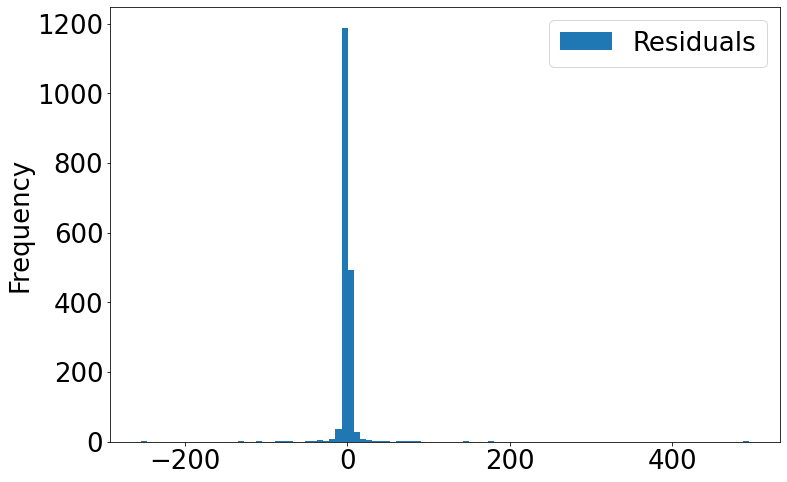

In [77]:
reg_data["Residuals"] = results.resid
fig, ax = plt.subplots(figsize = (12,8))

reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)

In [78]:
betaEstimates = results.params
tStats = results.tvalues
pValues = results.pvalues
stdErrors = results.bse

resultsDict = {"Beta Estimates" : betaEstimates,
              "t-stats":tStats,
              "p-values":pValues,
              "Standard Errors":stdErrors}
resultsDF = pd.DataFrame(resultsDict)
resultsDF.round(3)

,Beta Estimates,t-stats,p-values,Standard Errors
Size of Government,-0.201,-0.590,0.555,0.340
Legal System & Property Rights,0.450,1.214,0.225,0.371
Sound Money,-0.021,-0.053,0.958,0.406
Freedom to trade internationally,0.001,0.002,0.999,0.607
Regulation,-0.155,-0.302,0.763,0.513
RGDP Per Capita Lag,-0.004,-0.167,0.867,0.024


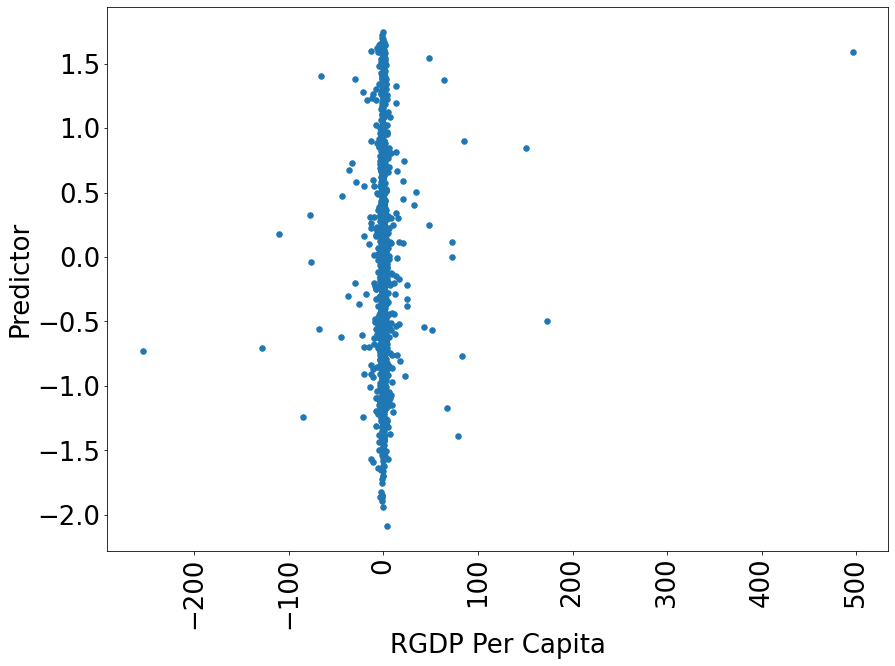

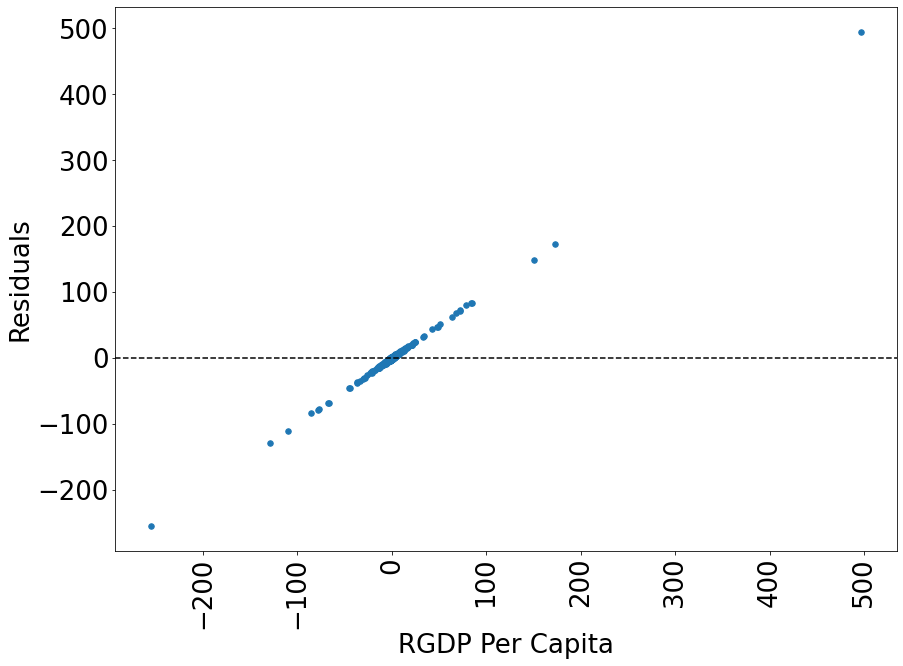

In [79]:
fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_var[0],
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_var[0],
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()
